### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('data/coupons.csv')

In [6]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [9]:
num_rows = data.shape[0]
print('The dataframe has ' + str(num_rows) + ' rows.')

# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display the rows with missing values
print('\nRows With Missing Values')
print(missing_values[missing_values > 0])

#Contextualize the amount of car data that is missing
missing_car = (missing_values['car']/num_rows)*100
print('\n' + str(missing_car) + '% of car data is missing.')

# Calculate the number of null values in each row
null_counts = data.isnull().sum(axis=1)

# Filter rows where the number of null values is greater than 1
rows_with_multiple_nulls = data[null_counts > 1]

# Display the rows with multiple null values
print(str(rows_with_multiple_nulls.shape[0]) + ' rows have more than 1 value missing.' )

The dataframe has 12684 rows.

Rows With Missing Values
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64

99.14853358561967% of car data is missing.
605 rows have more than 1 value missing.


3. Decide what to do about your missing data -- drop, replace, other...

**Data Quality Analysis**

1. 605 rows have more than 1 value missing. As opposed to filling these rows we will drop them from the dataset.

2. The dataset contains 12,684 rows but the car column has 12,576 missing values representing >99% of the rows. We will drop this column due to the high proportion of missing data.

3. For the other columns with missing values (Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50), we will fill based on the most frequent value (mode) of each respective column:

    - *Bar*: The mode will represent the most common behavior for bar visits.
    - *CoffeeHouse*: The mode will represent the most common behavior for coffee house visits.
    - *CarryAway*: The mode will capture the most typical behavior for purchasing carry-out food.
    - *RestaurantLessThan20*: The mode will represent the most common frequency of eating at restaurants with an average expense of less than \$20 per person.
    - *Restaurant20To50*: The mode will represent the most common frequency of eating at restaurants with an average expense of \$20 to \$50 per person.
    - *passanger*: This column is spelled incorrectly. While this is mostly incosequential we will rename the column (to *passenger*) to make the dataset more intuitive to work with.

In [13]:
# Drop the rows that have more than one missing value
null_counts = data.isnull().sum(axis=1)
data = data[null_counts <= 1]

#Drop the car column
data = data.drop(columns=['car'])

# Fill missing values in categorical columns with the mode
columns_to_fill = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

for column in columns_to_fill:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

# Rename the 'passanger' column to 'passenger'
data = data.rename(columns={'passanger': 'passenger'})

print('The dataframe now has no missing values:')
print(data.isnull().sum())
print('\nThe dataframe now has ' + str(data.shape[0]) + ' rows.')

The dataframe now has no missing values:
destination             0
passenger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

The dataframe now has 12079 rows.


4. What proportion of the total observations chose to accept the coupon? 



In [17]:
# Calculate the proportion of observations that accepted the coupon
accepted_proportion = data['Y'].mean()

# Display the result
print('Proportion that accepted the coupon: ' + str(accepted_proportion))

Proportion that accepted the coupon: 0.5693352098683666


5. Use a bar plot to visualize the `coupon` column.

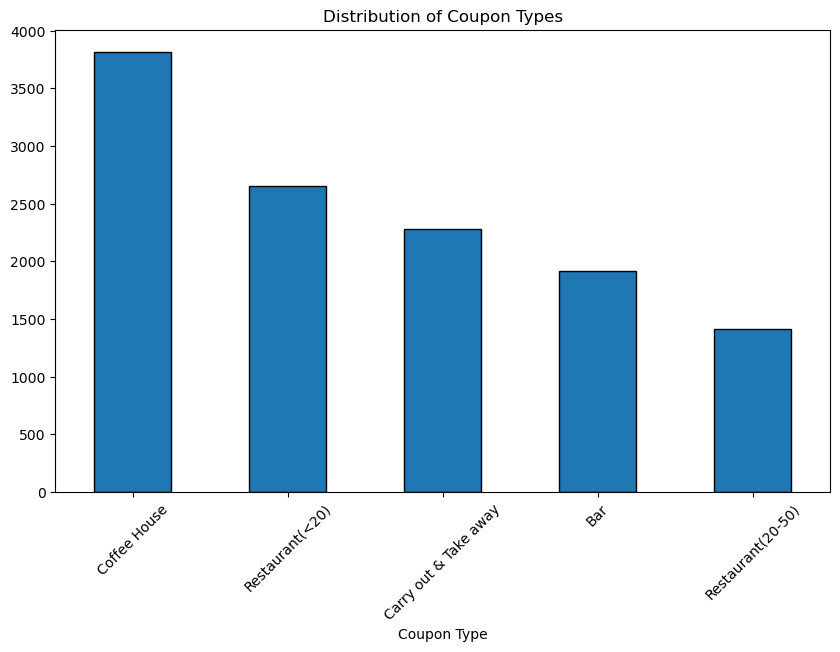

In [252]:
# Plot the distribution of the 'coupon' column
coupon_counts = data['coupon'].value_counts()

plt.figure(figsize=(10, 6))
coupon_counts.plot(kind='bar', edgecolor='k')
plt.xlabel('Coupon Type')
plt.title('Distribution of Coupon Types')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

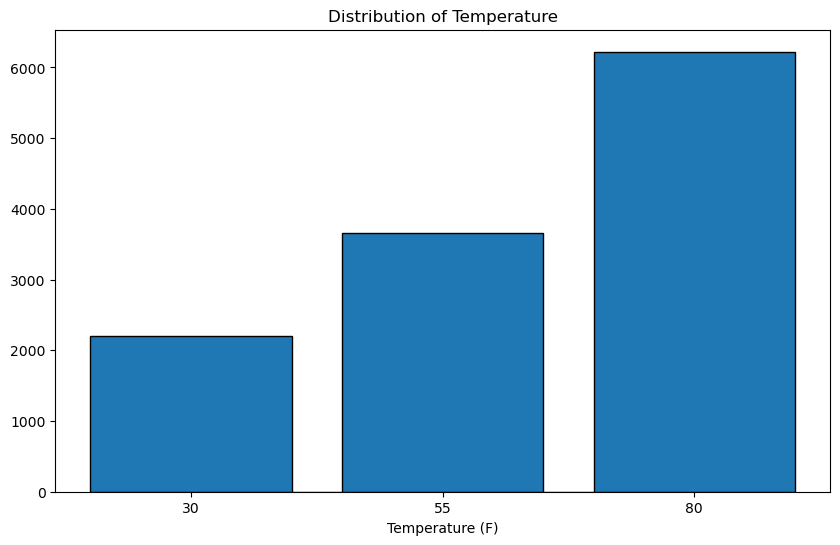

In [255]:
# Plot the histogram of the 'temperature' column
plt.figure(figsize=(10, 6))
plt.hist(data['temperature'], bins=[20, 40, 45, 65, 70, 90], edgecolor='k')
plt.xlabel('Temperature (F)')
plt.title('Distribution of Temperature')
plt.xticks([30, 55, 80])
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [19]:
# Create a new DataFrame that contains only the rows with bar coupons
bar_coupons_df = data[data['coupon'] == 'Bar']

# Verify that the new dataframe has only "Bar" coupon rows
print('Value Counts:')
print(bar_coupons_df['coupon'].value_counts())

Value Counts:
coupon
Bar    1913
Name: count, dtype: int64


2. What proportion of bar coupons were accepted?


In [21]:
# Calculate the proportion of observations that accepted the bar coupon
acceptance_rate1 = bar_coupons_df['Y'].mean()

# Display the result
print('Proportion that accepted the Bar coupon: ' + str(acceptance_rate1))

Proportion that accepted the Bar coupon: 0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [23]:
# Define the conditions for the two groups
few_visits = bar_coupons_df['Bar'].isin(['0', 'less1', '1~3'])
many_visits = bar_coupons_df['Bar'].isin(['4~8', 'gt8'])

# Calculate the acceptance rate for each group
acceptance_rate2 = bar_coupons_df[few_visits]['Y'].mean()
acceptance_rate3 = bar_coupons_df[many_visits]['Y'].mean()

# Display the results
acceptance_rate2, acceptance_rate3

(0.5278969957081545, 0.7616580310880829)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [267]:
over_25 = bar_coupons_df['age'].isin(['26', '31', '36', '41', '46', '50plus'])
under_25 = bar_coupons_df['age'].isin(['below21', '21'])

over25_many_visits = (over_25) & (many_visits)
over25_few_visits = (over_25) & (few_visits)
under25_many_visits = (under_25) & (many_visits)
under25_few_visits = (under_25) & (few_visits)

# Calculate the acceptance rate for each group
acceptance_rate4 = bar_coupons_df[over25_many_visits]['Y'].mean()
acceptance_rate5 = bar_coupons_df[over25_few_visits]['Y'].mean()
acceptance_rate6 = bar_coupons_df[under25_many_visits]['Y'].mean()
acceptance_rate7 = bar_coupons_df[under25_few_visits]['Y'].mean()

acceptance_rate4, acceptance_rate5, acceptance_rate6, acceptance_rate7

(0.7669172932330827, 0.5035360678925035, 0.75, 0.6044444444444445)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [270]:
oneplus_visits = bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])
nokid_passengers = bar_coupons_df['passenger'].isin(['Alone', 'Friend(s)', 'Partner'])
select_occupations = ~bar_coupons_df['occupation'].isin(['Farming', 'Fishing', 'Forestry'])

combined_conditions = oneplus_visits & nokid_passengers & select_occupations

acceptance_rate8 = bar_coupons_df[combined_conditions]['Y'].mean()

acceptance_rate8

0.7094339622641509

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [273]:
not_widowed = ~bar_coupons_df['maritalStatus'].isin(['Widowed'])
under30 = bar_coupons_df['age'].isin(['below21', '21', '26'])
cheap_restaurants = bar_coupons_df['RestaurantLessThan20'].isin(['4~8', 'gt8'])
income_under50k = bar_coupons_df['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])

condition1 = oneplus_visits & nokid_passengers & not_widowed
condition2 = oneplus_visits & under30
condition3 = cheap_restaurants & income_under50k

acceptance_rate9 = bar_coupons_df[condition1]['Y'].mean()
acceptance_rate10 = bar_coupons_df[condition2]['Y'].mean()
acceptance_rate11 = bar_coupons_df[condition3]['Y'].mean()

acceptance_rate9, acceptance_rate10, acceptance_rate11

(0.7094339622641509, 0.7195121951219512, 0.45645645645645644)

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

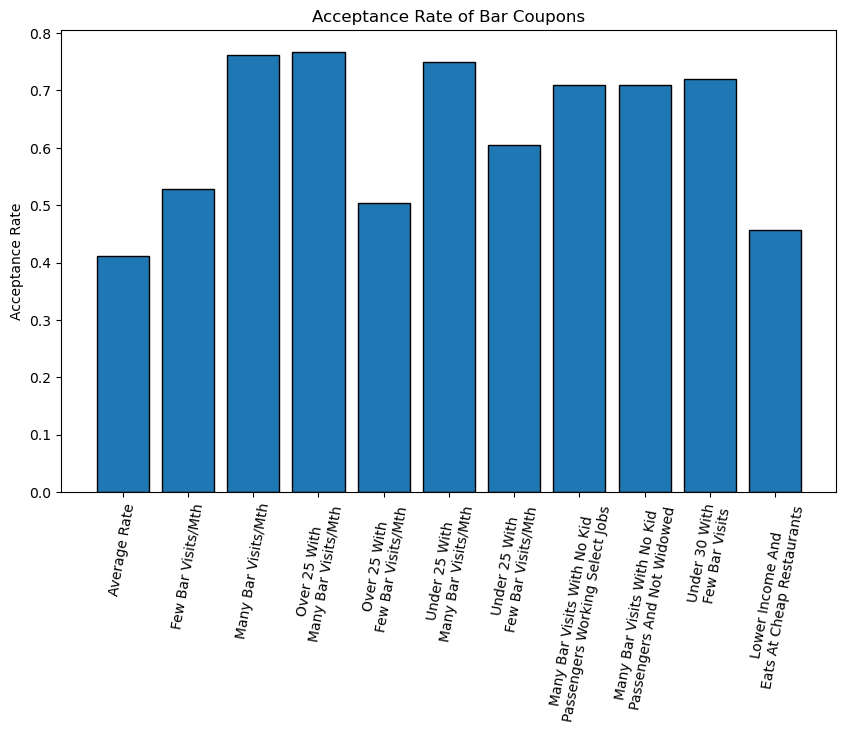

In [290]:
# List of acceptance rates
acceptance_rates = [acceptance_rate1, acceptance_rate2, acceptance_rate3, acceptance_rate4, acceptance_rate5, 
                    acceptance_rate6, acceptance_rate7, acceptance_rate8, acceptance_rate9, acceptance_rate10, acceptance_rate11]

# Labels for each acceptance rate
labels = ['Average Rate', 'Few Bar Visits/Mth', 'Many Bar Visits/Mth', 'Over 25 With\nMany Bar Visits/Mth', 'Over 25 With\nFew Bar Visits/Mth', 
          'Under 25 With\nMany Bar Visits/Mth', 'Under 25 With\nFew Bar Visits/Mth', 'Many Bar Visits With No Kid\nPassengers Working Select Jobs', 
          'Many Bar Visits With No Kid\nPassengers And Not Widowed', 'Under 30 With\nFew Bar Visits', 'Lower Income And\nEats At Cheap Restaurants']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, acceptance_rates, edgecolor='k')

# Add titles and labels
plt.title('Acceptance Rate of Bar Coupons')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=80)

# Display the chart
plt.show()

**Analysis**

Respondents who frequented bars were highly likely to accept the Bar coupon. Respondents under 21 that visited bars infrequently were only 60% likely to accept the coupon but when combined with similarly inclined respondents that were 26 the acceptance rate increased significantly to 70%. Furthermore Lower income/lower spending respondents were among the least likely to accept the coupon. In conclusion it would appear that drivers with more disposable income that visit bars frequently were most likely to accept the Bar coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  